In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as  mpl

In [2]:
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
def readData(y,s,c):
    df = pd.read_csv("lvr_land/"+ y +"-s" + s + "/" + c + "_lvr_land_A.csv",encoding='utf-8',low_memory=False)
    return df

In [4]:
def combineDF(df1,df2):
    df = pd.concat([df1,df2],axis = 0)
    return df

In [5]:
def selectFarmland(df):
    
    df = df[["鄉鎮市區","土地移轉總面積(平方公尺)","交易標的","都市土地使用分區","非都市土地使用分區","非都市土地使用編定","總價(元)","單價(元/平方公尺)"]]
    df = df[(df.交易標的 == "土地")]  
    df_farmland = df[(((df.非都市土地使用分區 == '特定農業區')|(df.非都市土地使用分區 == "一般農業區"))&(df.非都市土地使用編定 =="農牧用地"))]
    #排除都市土地
    df_farmland = df_farmland[df_farmland["都市土地使用分區"].isnull()]
    return df_farmland

In [6]:
def fillNanprice(df_farmland):
    #modify zero or nan price
    df_ok = df_farmland[(df_farmland["單價(元/平方公尺)"].notnull())&(df_farmland["單價(元/平方公尺)"] != "0")]
    df = df_farmland[(df_farmland["單價(元/平方公尺)"].isnull())|(df_farmland["單價(元/平方公尺)"] == "0")]
    df = df[(df['土地移轉總面積(平方公尺)'] != "0")&(df['總價(元)'] != "0")]
    df["單價(元/平方公尺)"] = calculateprice(df['總價(元)'],df['土地移轉總面積(平方公尺)'])
    df_farmland = pd.concat([df_ok,df],axis = 0)
    return df_farmland

In [7]:
def squaremeter2pings(df):
    df = df['單價(元/平方公尺)']*0.3025 #1m^2 = 0.3025 pings
    return df

In [8]:
def calculateprice(total_price,area):
    return pd.to_numeric(total_price)/pd.to_numeric(area)

In [9]:
def calculateMean(df_farmland):

    landpriceMean = pd.to_numeric(df_farmland['單價(元/平方公尺)']).mean()
   
    return landpriceMean

In [10]:
def calculateGain(cityMeandict,div):
    
    #dict to df
    arr = list(cityMeandict.items())
    df = pd.DataFrame(arr, columns=['年份','單價'])
    
    #逐年漲幅
    gain = df["單價"].pct_change(div)
    
    return gain

In [11]:
list_cityfilename = ['A','B','C','D','E','F','G','H','I','J','K','M','N','O','P','Q','T','U','V','W','X','Z']
list_city = ['台北市','台中市','基隆市','台南市','高雄市','新北市','宜蘭縣','桃園縣','嘉義市','新竹縣','苗栗縣','南投縣','彰化縣','新竹市','雲林縣','嘉義縣','屏東縣','花蓮縣','台東縣','金門縣','澎湖縣','連江縣']
#combine嘉義縣市(I,Q) 新竹縣市(O,J)
s=4 #season
各年單價平均 ={}
各年單價平均1 = {}
for y in range(101,108):
    
    df = pd.DataFrame()
    
    while s<=4:
        for c in list_cityfilename:
            df_s =  readData(str(y),str(s),c)
            df = combineDF(df,df_s)
        if y == 107 and s == 2:
            break
        s = s+1
    s=1
    
    # select farmland
    df_farmland = selectFarmland(df)
    # fill nan price
    df_farmland = fillNanprice(df_farmland)
    
    #台灣各年平均單價
    各年單價平均[y] = calculateMean(df_farmland)*0.3025 # m^2 to pings



    

In [12]:
print("各年單價平均")
print("|年",end='')
for i in range(101,108):
    print("|"+str(i),end='')
print("|")
print("|單價（坪）",end='')
for key in 各年單價平均:
    print("|"+"{:.1f}".format(各年單價平均[key]),end='')
print("|")

各年單價平均
|年|101|102|103|104|105|106|107|
|單價（坪）|1088.6|1387.2|1433.2|1257.4|1214.9|1134.9|1160.2|


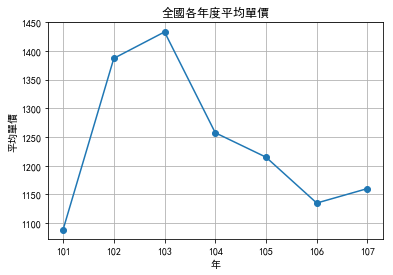

In [13]:
# plot 台灣逐年平均
plt.plot(各年單價平均.keys(),各年單價平均.values(),marker='o',linestyle='solid')
plt.xlabel("年")
plt.ylabel("平均單價")
plt.title("全國各年度平均單價")
plt.grid() 
plt.savefig("全國各年度平均單價")
plt.show()

In [14]:
#全國總漲幅 
totalgain = calculateGain(各年單價平均,6)
print("全國總漲幅")
print(totalgain*100)
# #全國各年漲幅 
# gain_dict = {}

# i=101 
# for g in gain:
#     gain_dict[i]=g*100 # %
#     print("|"+str(i)+"|",end='')
#     print(str(g*100)+"|") 
#     i+=1


全國總漲幅
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    6.571655
Name: 單價, dtype: float64


In [15]:
# #plot 台灣逐年漲幅
# plt.bar(gain_dict.keys(),gain_dict.values())
# plt.xlabel("年")
# plt.ylabel("%")
# plt.title("台灣逐年漲幅")
# plt.grid()
# plt.savefig("台灣逐年漲幅")
# plt.show()